## 1. Importing software packages and loading Baseline

For running this tutorial, you need to have:
- The `message_ix` modeling framework was installed successfully with a version >= 3.4.0 (see instructions [here](https://docs.messageix.org/en/stable/#getting-started) ).


In [1]:
# Importing required software packages
import pandas as pd
import os
import ixmp
import message_ix
from plotter import plotter

<IPython.core.display.Javascript object>

In [2]:
# Getting path to this project on your machine
# path = os.path.dirname(os.path.realpath("__file__")).strip("\scripts")
path = os.getcwd().strip("\scripts")

In [4]:
# Loading modeling platform (this will link you to your database)
mp = ixmp.Platform()

In [5]:
# Creating a new scenario with desired model/scenario names
model = 'MESSAGEix_KR'
scenario = 'baseline'
base = message_ix.Scenario(mp, model, scenario, version='new')

In [6]:
# Specify the filename to the input Excel file
filename = '\\MESSAGEix_KR_baseline.xlsx'
xls_file = path + "\\data" + filename

# Loading data of the Baseline scenario from Excel (may take few minutes)
# base.read_excel("H:\MyDocuments\Projects\GUIDE\MESSAGEix_KR_collabo\data\MESSAGEix_KR_baseline.xlsx", init_items=True, add_units=True, commit_steps=True)
base.read_excel(xls_file, init_items=True, add_units=True, commit_steps=True)

Existing set 'map_tec_storage' has index names(s)  ['node', 'technology', 'storage_tec', 'level', 'commodity'] != ['node', 'technology', 'mode', 'storage_tec', 'storage_mode', 'level', 'commodity', 'lvl_temporal'] in MESSAGEix_KR_baseline.xlsx


## 2. Looking into model parameters (input data)
`message_ix` formulation is written in GAMS, a programming and optimization software. Hence, `message_ix` uses the same syntax as GAMS, which means the model has:
- index sets: such as set of technologies ('technology'), locations ('node'), etc.
- parameters (input data): such as investment cost ('inv_cost'), capcaity factor ('capacity_factor') etc.
- variables (output results): such as total installed capacity ('CAP'), activity ('ACT') etc.

You can list these items by using relevant syntax. For example, for listing `message_ix` sets, you can run the command: `base.set_list()`, and for listing available parameters run `base.par_list()`.
For more information on each of the model sets and parameters, please refer to the documentation, e.g., [parameter definitions](https://docs.messageix.org/en/master/model/MESSAGE/parameter_def.html). 

### Hint:
You can use python syntax to filter or look for some specific parameters, e.g., containing a word or term in their name (see example below).

In [7]:
# Listing parameters that have a string of "cost" in their name
[x for x in base.par_list() if 'cost' in x]

['resource_cost',
 'inv_cost',
 'fix_cost',
 'var_cost',
 'abs_cost_new_capacity_soft_up',
 'abs_cost_new_capacity_soft_lo',
 'level_cost_new_capacity_soft_up',
 'level_cost_new_capacity_soft_lo',
 'abs_cost_activity_soft_up',
 'abs_cost_activity_soft_lo',
 'level_cost_activity_soft_up',
 'level_cost_activity_soft_lo',
 'land_cost',
 'relation_cost',
 'cost_MESSAGE']

### 2.1. Loading input data
You can load parameters by their name and investigate them. The output will be a python dataframe, which looks like a stacked table. Also, we can load a portion of a parameter data, i.e., by slicing the table. See the examples below:

In [8]:
# Loading data of a parameter (with no filter, it returns the entire table)
parname = 'var_cost'   # variable O&M cost
table = base.par(parname)
# see the table and column names (if the table is large, you will only see the beginning and end rows)
table

,node_loc,technology,year_vtg,year_act,mode,time,value,unit
0,Korea,CF4_TCE,1990,1990,M1,year,0.0,USD/kWa
1,Korea,CF4_TCE,1995,1995,M1,year,0.0,USD/kWa
2,Korea,CF4_TCE,2000,2000,M1,year,0.0,USD/kWa
3,Korea,CF4_TCE,2005,2005,M1,year,0.0,USD/kWa
4,Korea,CF4_TCE,2010,2010,M1,year,0.0,USD/kWa
...,...,...,...,...,...,...,...,...
12807,Korea,gas_imp,2060,2060,M1,year,0.0,USD/kWa
12808,Korea,gas_imp,2070,2070,M1,year,0.0,USD/kWa
12809,Korea,gas_imp,2080,2080,M1,year,0.0,USD/kWa
12810,Korea,gas_imp,2090,2090,M1,year,0.0,USD/kWa


In [9]:
# Loading data of a parameter, by filtering a portion of the table
parname = 'inv_cost'   # CAPEX
tec = 'coal_ppl'       # coal power plant
node = 'Korea'           # Korea

# Notice the syntax for filtering
table = base.par(parname, {'technology': tec, 'node_loc':node})
# see the table and column names
table

,node_loc,technology,year_vtg,value,unit
0,Korea,coal_ppl,2020,809.75,USD/kW
1,Korea,coal_ppl,2030,1037.49,USD/kW
2,Korea,coal_ppl,2040,1168.04,USD/kW
3,Korea,coal_ppl,2050,1225.15,USD/kW
4,Korea,coal_ppl,2060,1230.70,USD/kW
5,Korea,coal_ppl,2070,1206.54,USD/kW
6,Korea,coal_ppl,2080,1174.57,USD/kW
7,Korea,coal_ppl,2090,1156.64,USD/kW
8,Korea,coal_ppl,2100,1174.64,USD/kW
9,Korea,coal_ppl,2015,809.75,USD/kW


In [10]:
# Loading data of a parameter, even with more filters
parname = 'var_cost'   # variable O&M cost
techno = 'coal_extr'   # coal extraction process
node = 'Korea'           # Uzbekistan
years = [2025, 2030, 2035, 2040]           # activity years of 2025-2040

# Notice the syntax when we pass a list to an index
table = base.par(parname, {'technology': techno, 'node_loc':node,
                           'year_act': years})
# see the content
table  

,node_loc,technology,year_vtg,year_act,mode,time,value,unit
1048,Korea,coal_extr,2020,2025,M1,year,15.0,USD/kWa
1049,Korea,coal_extr,2025,2025,M1,year,15.0,USD/kWa
1050,Korea,coal_extr,2025,2030,M1,year,15.0,USD/kWa
1051,Korea,coal_extr,2030,2030,M1,year,15.0,USD/kWa
1052,Korea,coal_extr,2030,2035,M1,year,15.0,USD/kWa
1053,Korea,coal_extr,2035,2035,M1,year,15.0,USD/kWa
1054,Korea,coal_extr,2035,2040,M1,year,15.0,USD/kWa
1055,Korea,coal_extr,2040,2040,M1,year,15.0,USD/kWa


In [11]:
# If you don't know the index names related to the parameter (i.e., column names of the table), you can see them by:
base.idx_names('inv_cost')

['node_loc', 'technology', 'year_vtg']

### Info (1): units in the MESSAGEix_KR model
As you saw in the example above, "unit" is not listed as an index. In the MESSAGEix formulation, "unit" is defined by the user just for information, and it does NOT affect the calculations. In other words, MESSAGEix does not check the units, nor convert them. Hence, this is the user that should be careful when defining parameters and adding "value" to the parameters to ensure consistency and accuracy of the units. In the MESSAGEix_KR model, the units are as follows:
- unit of capacity: GW
- unit of activity: GWa (gigawatts-year) (1 GWa = 8.76 TWh)
- unit of investment cost: \\$/kW (= M\\$/GW)
- unit of variable cost: \\$/kWa (= M\\$/GWa)
- unit of water flow: 1000 m3/s (thousand cubic meter per second)
- unit of CO2 emission: Mt of Ceq
- unit of other emissions: kt

### 2.2. Visualizing input data
You can visualize input data and investigate them. For this, you can use python visualization methods or a few functions provided in this repository.

<Axes: title={'center': 'CAPEX of solar_pv_ppl ($/kW)'}, xlabel='Year'>

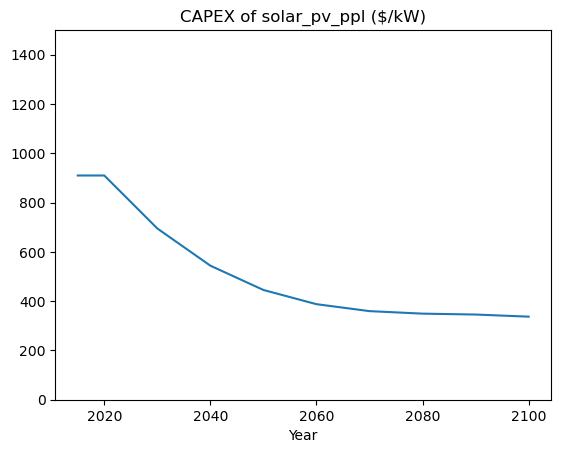

In [12]:
# Visualizing input data in a parameter for certain technologies or commodities
node = "Korea"
tec = "solar_pv_ppl"        # solar PV
parameter = "inv_cost"      # CAPEX
df = base.par(parameter, {"technology": tec, "node_loc": node}).sort_values(["year_vtg"])
df = df.loc[df["year_vtg"] >= 2015]

# Plotting
pl = pd.Series(df["value"].to_list(),
                        index=pd.Index(df["year_vtg"].to_list(), name='Year'))
pl.plot(title='CAPEX of {} ($/kW)'.format(tec), ylim=[0, 1500])

## 4. Solving the scenario
After committing the changes, we are ready to solve the scenario. Solving the scenario means sending the input data from your database to GAMS formulation in the form of GDX files, solving the mathematical formulation, and retrieving the output results (MESSAGEix variables) back to your database. If solving the scenario succeeds without an error, we will be able to look into the results. Otherwise, you need to find out why the scenario has been insolvable.

#### Tip (1): Solver options
Large MESSAGEix models solve more quickly in "Barrier" method when using CPLEX as the solver. You can pass this option through `solve_options` arguments as below.

#### Tip (2): Case name
You can send your scenario for solving with a user-defined name. This name will be used to name the GDX files in GAMS, and it does not change the model/scenario name in your scenario database. You can leave the case name empty.

In [14]:
# Solving the scenario (may up to 3 minutes)
casename = ('_').join([base.model, base.scenario, str(base.version)])
base.solve(solve_options={'lpmethod': '4'})
#base.solve(model='MESSAGE-MACRO', solve_options={'lpmethod': '4'})

In [15]:
# See the version of this scenario in your database
base.version

1

## 4.1. Visualizing output results
In this part, we can visualize some output results both on the sub-annual and yearly basis.

In [16]:
from plotter import plotter
plotter("Korea baseline", base, "Korea", path + "//data/results")

OSError: Cannot save file into a non-existent directory: 'C:\Users\kimc0\MESSAGEix_KR_collabo\data\results\plots'

In [17]:
# Close the database at the end of your work
mp.close_db()